In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use("ggplot")

from sklearn.model_selection import train_test_split

import tensorflow as tf

%matplotlib inline

In [2]:
col_names = [
    "wavelet_var",
    "wavelet_skew",
    "wavelet_curtosis",
    "entropy",
    "label"
]

In [3]:
notes = pd.read_csv("./data_banknote_authentication.txt", header=None, names=col_names)

In [4]:
notes.label.value_counts()

0    762
1    610
Name: label, dtype: int64

In [5]:
notes

,wavelet_var,wavelet_skew,wavelet_curtosis,entropy,label
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


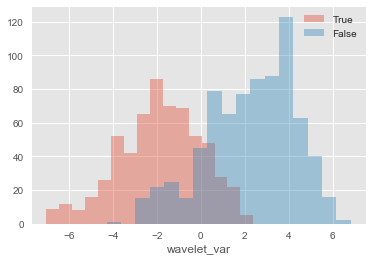

In [6]:
sns.distplot(notes[notes["label"] == 1]["wavelet_var"], kde=False, label="True")
sns.distplot(notes[notes["label"] == 0]["wavelet_var"], kde=False, label="False")
plt.legend()

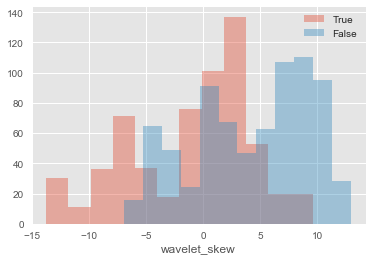

In [7]:
sns.distplot(notes[notes["label"] == 1]["wavelet_skew"], kde=False, label="True")
sns.distplot(notes[notes["label"] == 0]["wavelet_skew"], kde=False, label="False")
plt.legend()

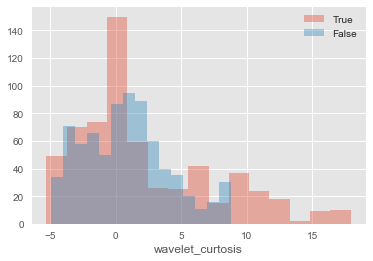

In [8]:
sns.distplot(notes[notes["label"] == 1]["wavelet_curtosis"], kde=False, label="True")
sns.distplot(notes[notes["label"] == 0]["wavelet_curtosis"], kde=False, label="False")
plt.legend()

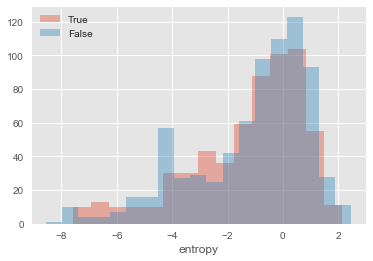

In [9]:
sns.distplot(notes[notes["label"] == 1]["entropy"], kde=False, label="True")
sns.distplot(notes[notes["label"] == 0]["entropy"], kde=False, label="False")
plt.legend()

### Running a Deep Learning Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    notes.iloc[:, :-1], 
                                                    notes["label"], 
                                                    test_size=0.3, 
                                                    stratify=notes["label"]
                                                    )

In [19]:
X_train.shape

(960, 4)

In [114]:
# set up your parameters

learning_rate = 0.001
epochs = 10
batch_size = 96

n_classes = 2
n_samples = X_train.shape[0] # 960
n_input = X_train.shape[1] # 4

n_hidden_1 = 128
n_hidden_2 = 128


In [96]:
# Now we want to generate a dictionary specifying the details of the weights and bias we want to feed into to the network
# We also initialise the weights randomly here.

weights = {
    "w1" : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    "w2" : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    "w_res" : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

bias = {
    "b1" : tf.Variable(tf.random_normal([n_hidden_1])),
    "b2" : tf.Variable(tf.random_normal([n_hidden_2])),
    "b_res" : tf.Variable(tf.random_normal([n_classes]))
}

In [97]:
def multilayer_perceptron(x, weights, bias):
    """
    
    Parameters
    ----------
    x : Placeholder for inputs
    weights : Dictionary of weights
    bias : Dictionary of bias values
    
    Returns
    -------
    Output of the forward propagation
    """
    
    # Y = X*w + b
    
    layer_1 = tf.add(tf.matmul(x, weights["w1"]), bias["b1"])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights["w2"]), bias["b2"])
    layer_2 = tf.nn.relu(layer_2)
    
    result = tf.matmul(layer_2, weights["w_res"]) + bias["b_res"]
    return result

For one single instance:

L1:  (1 x 4)   x (4, 128)    + (1, 128) <br>
L2:  (1 x 128) x (128 x 128) + (1, 128) <br>
OUT: (1 x 128) x (128 x 2)   + (1, 2)

In [98]:
# We hold the features and labels in tf as below:

features = tf.placeholder("float", shape=[None, n_input])
labels = tf.placeholder("float", shape=[None, n_classes])

In [99]:
prediction = multilayer_perceptron(features, weights, bias)
prediction

<tf.Tensor 'add_21:0' shape=(?, 2) dtype=float32>

In [101]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

print(cost)
print("----------------")
print(optimiser)

Tensor("Mean_1:0", shape=(), dtype=float32)
----------------
name: "Adam_1"
op: "NoOp"
input: "^Adam_1/update_Variable_32/ApplyAdam"
input: "^Adam_1/update_Variable_33/ApplyAdam"
input: "^Adam_1/update_Variable_34/ApplyAdam"
input: "^Adam_1/update_Variable_35/ApplyAdam"
input: "^Adam_1/update_Variable_36/ApplyAdam"
input: "^Adam_1/update_Variable_37/ApplyAdam"
input: "^Adam_1/Assign"
input: "^Adam_1/Assign_1"



In [113]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()

/Users/Jerry/anaconda/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [116]:
for epoch in range(epochs):
    avg_cost = 0.0
    
    batch_number = X_train.shape[0]/batch_size
    
    
    
    for batch in range(batch_number):
        
        idx_start = batch*96
        idx_end = (batch+1)*96-1 
        
        batch_x, batch_y = X_train.iloc[idx_start:idx_end]
        
        variables_dict = {
            features : batch_x,
            labels : batch_y
        }
        
        _, c = sess.run([optimiser, cost], )
        

0
1
2
3
4
5
6
7
8
9


In [112]:
tf.InteractiveSession.close(sess)

### Experimental Code

In [51]:
x_array = [[1, 2, 3], [4, 5, 6]]
y_array = [[10, 20], [30, 40], [50, 60]]
           

In [52]:
print(x_array)
print(y_array)

[[1, 2, 3], [4, 5, 6]]
[[10, 20], [30, 40], [50, 60]]


In [53]:
tf_x = tf.constant(x_array)
tf_y = tf.constant(y_array)

Tensor("Const_6:0", shape=(2, 3), dtype=int32)


In [55]:
with tf.Session() as sess:
    xD = sess.run(tf.matmul(tf_x, tf_y))
    print(xD)

[[220 280]
 [490 640]]
